# Exploratory Data Analysis on San Francisco Employee Dataset 

### Import Libraries

In [271]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
%matplotlib inline

### Load Dataset

In [273]:
data = pd.read_csv('Total.csv')
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,Not Provided,326373.19,326373.19,2011


### Clean the data

In [274]:
data.info()   # get summary information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [275]:
data.iloc[81391]   # locate a random row and observe entries

EmployeeName        Kevin P Cashman
JobTitle             Deputy Chief 3
BasePay                Not Provided
OvertimePay                       0
OtherPay                     149934
Benefits                          0
TotalPay                     149934
TotalPayBenefits             149934
Year                           2013
Name: 81391, dtype: object

In the entry above, the BasePay column had the value "Not Provided". Such entries will not be relevant in our analysis and so must be removed from the data.

In [276]:
# remove all such entries from other numerical columns 

list = ['BasePay','OvertimePay','OtherPay','Benefits']
for category in list:
    data = data[data[category] != 'Not Provided']
data

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128809,220909,13126.3,44430.12,362844.66,407274.78,2012
36160,Gregory Suhr,Chief of Police,302578,0,18974.1,69810.19,321552.11,391362.30,2012
36161,Khoa Trinh,Electronic Maintenance Tech,111921,146415,78057.4,53102.29,336393.73,389496.02,2012
36162,Joanne Hayes-White,"Chief, Fire Department",296943,0,17816.6,72047.88,314759.60,386807.48,2012
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863,192424,17917.2,44438.25,337204.86,381643.11,2012
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0,0,0,0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0,0,0,0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0,0,0,0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0,0,0,0,0.00,0.00,2018


From data.info() it was observed that the dtypes for columns containing numerical values weren't classified as such.

In [277]:
# Convert columns to numeric 
#This also acts as a checker to see if there are any more unwanted entries in the column

for category in list:
    data[category] = pd.to_numeric(data[category])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276117 entries, 36159 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      276117 non-null  object 
 1   JobTitle          276117 non-null  object 
 2   BasePay           276117 non-null  float64
 3   OvertimePay       276117 non-null  float64
 4   OtherPay          276117 non-null  float64
 5   Benefits          276117 non-null  float64
 6   TotalPay          276117 non-null  float64
 7   TotalPayBenefits  276117 non-null  float64
 8   Year              276117 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.1+ MB


In [278]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,276117.000000,276117.000000,276117.000000,276117.000000,276117.000000,276117.000000,276117.000000
mean,70621.791582,5830.348157,3438.137903,25060.072463,79890.277641,104950.350104,2015.103612
std,45908.600575,13014.397091,7285.200937,15076.283829,53805.549905,67579.288482,1.997828
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2012.000000
25%,36083.880000,0.000000,0.000000,12935.090000,39604.480000,53091.930000,2013.000000
50%,68432.810000,0.000000,720.000000,28347.670000,75986.010000,104454.640000,2015.000000
75%,100674.000000,5412.660000,3953.740000,35285.920000,112794.900000,148009.380000,2017.000000
max,592394.340000,309481.030000,342802.630000,125891.730000,592394.340000,712802.360000,2018.000000


There are zeros and negative numbers as the minimum values of the various Pay columns. This is clearly invalid or irrelevant data and all entries in that margin will be dropped.

In [279]:
#this code will compile all numerical features into a single list

numeric_features = [data._get_numeric_data().columns]
numeric_features

[Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
        'TotalPayBenefits', 'Year'],
       dtype='object')]

In [286]:
for col in numeric_features:
    data = data[data[col] > 0]       # removes rows with entries in their numeric features less than 0
data.describe()    # this is to check the minimum values of all columns and confirm if the extraction process was successful

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,273310.000000,135578.000000,192091.000000,273171.000000,275701.00000,276057.000000,276117.000000
mean,71347.111171,11874.039556,4942.118636,25330.475746,80010.82789,104973.179514,2015.103612
std,45579.550886,16528.292417,8298.017885,14929.536362,53756.48514,67568.885863,1.997828
min,0.100000,0.010000,0.010000,0.010000,0.01000,0.010000,2012.000000
25%,38184.827500,1703.382500,624.000000,13818.940000,39920.00000,53169.230000,2013.000000
50%,68869.610000,5624.555000,2009.650000,28476.920000,76075.46000,104469.420000,2015.000000
75%,101088.000000,15404.342500,6146.535000,35363.415000,112818.95000,148021.490000,2017.000000
max,592394.340000,309481.030000,342802.630000,125891.730000,592394.34000,712802.360000,2018.000000


In [281]:
categorical_features = [set(data.columns) - set(data._get_numeric_data().columns)]
categorical_features

[{'EmployeeName', 'JobTitle'}]

In [282]:
data.groupby('Year').mean()['BasePay']

Year
2012    66212.629578
2013    69630.030216
2014    67316.721920
2015    69515.811885
2016    72123.238420
2017    75265.923215
2018    78076.808437
Name: BasePay, dtype: float64

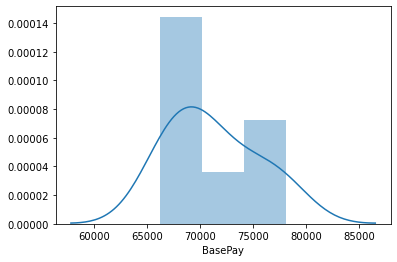

In [283]:
sns.distplot(data.groupby('Year').mean()['BasePay'], hist=True, kde=True)

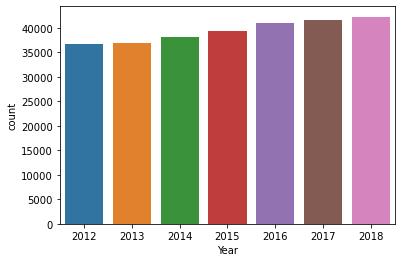

In [284]:
sns.countplot(x='Year', data=data)

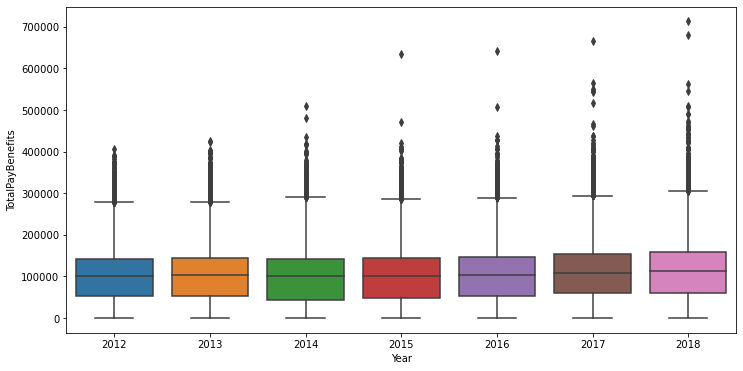

In [285]:
plt.figure(figsize=(12,6))
sns.boxplot('Year', 'TotalPayBenefits', data=data)